In this notebook i will compare calibration results from two sphere wideband calibrations. And the results after ebing process with EK80.


In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import sphere_ts
import gsw
import math
%matplotlib inline

In [2]:
sns.set_theme(style="whitegrid")
sns.color_palette("viridis", as_cmap=True)
title_font = {
    'fontname': 'DejaVu Sans', 'size': '15', 'color': 'black',
    'weight': 'medium'
}
axis_font = {'fontname': 'DejaVu Sans', 'size': '13', 'color': 'black'}

In [3]:
plt.rcParams['font.size']= 15
mpl.rcParams['xtick.labelsize'] = 15
mpl.rcParams['ytick.labelsize'] = 15
mpl.rcParams['axes.labelsize'] = 15

#savefigs_path= 'C:/Users/mbd/OneDrive - Akvaplan-niva AS/PhD-APN/ChaptersandExperiments/Po'
#savefigjpg_path= 'C:/Users/mbd/OneDrive - Akvaplan-niva AS/PhD-APN/ChaptersandExperiments/AZKABAN-light/ZoopMix_paper/Figs/'

# 200 kHz calibration

In [26]:
EKcal_200_38 = pd.read_xml('E:PolarFront2022/2022-05/sailbuoy/2022_polarfront_sb_echo_1/CalibrationDataFile-D20220915-T132146.xml', xpath=".//CalibrationResults")
EKcal_200_22 = pd.read_xml('E:PolarFront2022/2022-05/sailbuoy/2022_polarfront_sb_echo_1/CalibrationDataFile-D20220915-T133914.xml', xpath=".//CalibrationResults")

EK_200_38_f = np.fromstring(EKcal_200_38.Frequency[0], dtype=float, sep=';')
EK_200_38_g = np.fromstring(EKcal_200_38.Gain[0], dtype=float, sep=';')
EK_200_38_mn_bw = np.fromstring(EKcal_200_38.BeamWidthAlongship[0], dtype=float, sep=';')
EK_200_38_mj_bw = np.fromstring(EKcal_200_38.BeamWidthAthwartship[0], dtype=float, sep=';')
EK_200_38_mn_ao = np.fromstring(EKcal_200_38.AngleOffsetAlongship[0], dtype=float, sep=';')
EK_200_38_mj_ao = np.fromstring(EKcal_200_38.AngleOffsetAthwartship[0], dtype=float, sep=';')

EK_200_22_f = np.fromstring(EKcal_200_22.Frequency[0], dtype=float, sep=';')
EK_200_22_g = np.fromstring(EKcal_200_22.Gain[0], dtype=float, sep=';')
EK_200_22_mn_bw = np.fromstring(EKcal_200_22.BeamWidthAlongship[0], dtype=float, sep=';')
EK_200_22_mj_bw = np.fromstring(EKcal_200_22.BeamWidthAthwartship[0], dtype=float, sep=';')
EK_200_22_mn_ao = np.fromstring(EKcal_200_22.AngleOffsetAlongship[0], dtype=float, sep=';')
EK_200_22_mj_ao = np.fromstring(EKcal_200_22.AngleOffsetAthwartship[0], dtype=float, sep=';')

Text(0.5, 0, 'Frequency (Hz)')

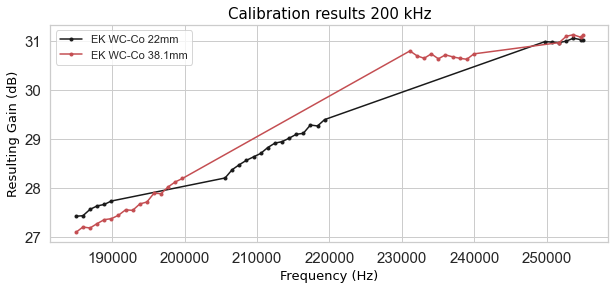

In [27]:
plt.figure(figsize=(10,4))

plt.plot(EK_200_22_f,EK_200_22_g, 'k.-',label='EK WC-Co 22mm')
plt.plot(EK_200_38_f,EK_200_38_g, 'r.-', label='EK WC-Co 38.1mm')
plt.legend()
plt.title('Calibration results 200 kHz',title_font)
plt.ylabel('Resulting Gain (dB)',axis_font)
plt.xlabel('Frequency (Hz)',axis_font)

Spheres agreement is acceptable 

### Let's take a deeper look and compare calibrated TS to theoretical TS


# Assess 200 kHz calibration

### Theoretical response

In [28]:
# sphere_ts : Gavin Macaulay's https://github.com/gavinmacaulay/SphereTS/blob/master/sphere_ts.py
f_start = 185000
f_stop = 255000 #Hz
a = 0.022 #m

sp = 35 #PSU
t = 0 #degC
p = 3 #m or dbar
# Get water properties
c, rho = sphere_ts.water_properties(sp, t, p)

# Get material properties of Tungsten carbide
mat_prop = sphere_ts.material_properties()
WC_Co = mat_prop['Tungsten carbide']

# Doesn't quite work...
freq_22, ts_22 =sphere_ts.freq_response(f_start, f_stop, a, 1446.56, WC_Co['c1'], WC_Co['c2'], rho, 1950)

In [29]:
c


1449.0552021335316

In [30]:
# theoretical 22 mm from EK80
SBcal_22 = pd.read_xml('E:PolarFront2022/2022-05/sailbuoy/2022_polarfront_sb_echo_1/CalibrationDataFile-D20220915-T132146.xml', xpath=".//TargetReference")
freq_22 =np.fromstring(SBcal_22.Frequency[0], dtype=float, sep=';')
ts_22 =np.fromstring(SBcal_22.Response[0], dtype=float, sep=';')

In [31]:
## theoretical 38 mm from EK80

SBcal_38 = pd.read_xml('E:PolarFront2022/2022-05/sailbuoy/2022_polarfront_sb_echo_1/CalibrationDataFile-D20220915-T133914.xml', xpath=".//TargetReference")
freq_38 =np.fromstring(SBcal_38.Frequency[0], dtype=float, sep=';')
ts_38 =np.fromstring(SBcal_38.Response[0], dtype=float, sep=';')

### Wideband frequency response exports from Echoview with different calibration parameters

# Combine spheres
For .ecs file do all cal params

## 200 kHz

In [32]:
# Start with 38.1 mm
ind_38 = np.where(np.diff(EK_200_38_f)>1000)[0]+1
ind_22 = np.where(np.diff(EK_200_22_f)>1000)[0]+1

In [33]:
# Combine with gain from 38.1 then 22 then 38.1
freq_200_combined = np.concatenate((EK_200_38_f[0:ind_38[0]], 
                                    EK_200_22_f[ind_22[0]:ind_22[1]],
                                    EK_200_38_f[ind_38[0]:ind_38[1]],
                                    EK_200_22_f[ind_22[1]:]))
gain_200_combined = np.concatenate((EK_200_38_g[0:ind_38[0]], 
                                    EK_200_22_g[ind_22[0]:ind_22[1]],
                                    EK_200_38_g[ind_38[0]:ind_38[1]],
                                    EK_200_22_g[ind_22[1]:]))
mj_ao_200_combined = np.concatenate((EK_200_38_mj_ao[0:ind_38[0]], 
                                     EK_200_22_mj_ao[ind_22[0]:ind_22[1]],
                                     EK_200_38_mj_ao[ind_38[0]:ind_38[1]], 
                                     EK_200_22_mj_ao[ind_22[1]:]))
mn_ao_200_combined = np.concatenate((EK_200_38_mn_ao[0:ind_38[0]], 
                                     EK_200_22_mn_ao[ind_22[0]:ind_22[1]],
                                     EK_200_38_mn_ao[ind_38[0]:ind_38[1]], 
                                     EK_200_22_mn_ao[ind_22[1]:]))
mj_bw_200_combined = np.concatenate((EK_200_38_mj_bw[0:ind_38[0]], 
                                     EK_200_22_mj_bw[ind_22[0]:ind_22[1]],
                                     EK_200_38_mj_bw[ind_38[0]:ind_38[1]], 
                                     EK_200_22_mj_bw[ind_22[1]:]))
mn_bw_200_combined = np.concatenate((EK_200_38_mn_bw[0:ind_38[0]], 
                                     EK_200_22_mn_bw[ind_22[0]:ind_22[1]],
                                     EK_200_38_mn_bw[ind_38[0]:ind_38[1]],
                                     EK_200_22_mn_bw[ind_22[1]:]))

In [34]:
# Combine with gain from 38.1 then 22 then 38.1
freq_200_combined = np.concatenate((EK_200_38_f[0:ind_38[0]], 
                                    EK_200_22_f[ind_22[0]:ind_22[1]],
                                    EK_200_38_f[ind_38[0]:]))
gain_200_combined = np.concatenate((EK_200_38_g[0:ind_38[0]], 
                                    EK_200_22_g[ind_22[0]:ind_22[1]],
                                    EK_200_38_g[ind_38[0]:]))
mj_ao_200_combined = np.concatenate((EK_200_38_mj_ao[0:ind_38[0]], 
                                     EK_200_22_mj_ao[ind_22[0]:ind_22[1]],
                                     EK_200_38_mj_ao[ind_38[0]:]))
mn_ao_200_combined = np.concatenate((EK_200_38_mn_ao[0:ind_38[0]], 
                                     EK_200_22_mn_ao[ind_22[0]:ind_22[1]],
                                     EK_200_38_mn_ao[ind_38[0]:]))
mj_bw_200_combined = np.concatenate((EK_200_38_mj_bw[0:ind_38[0]], 
                                     EK_200_22_mj_bw[ind_22[0]:ind_22[1]],
                                     EK_200_38_mj_bw[ind_38[0]:]))
mn_bw_200_combined = np.concatenate((EK_200_38_mn_bw[0:ind_38[0]], 
                                     EK_200_22_mn_bw[ind_22[0]:ind_22[1]],
                                     EK_200_38_mn_bw[ind_38[0]:]))

In [67]:
# Print for .ecs
var = mj_ao_200_combined
";".join([str(i) for i in var])

'0.01;0.02;0.02;0.03;0.02;0.03;0.03;0.04;0.03;0.04;0.04;0.04;0.03;0.04;0.03;0.04;0.05;0.05;0.06;0.07;0.06;0.06;0.06;0.05;0.07;0.08;0.05;0.07;0.07;0.08;0.05;0.02;0.02;0.02;0.02;0.01;0.01;0.01;0.01;0.01;0.01;0.01;0.02;0.01;0.0;-0.01'

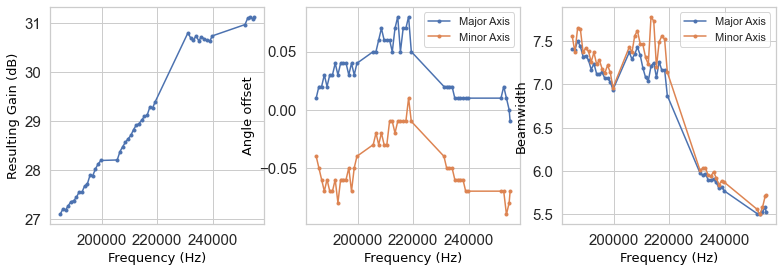

In [36]:
fig, ax = plt.subplots(1,3,figsize=(13,4))

ax[0].plot(freq_200_combined, gain_200_combined, '.-')
ax[0].set_ylabel('Resulting Gain (dB)',axis_font)
ax[0].set_xlabel('Frequency (Hz)',axis_font)

ax[1].plot(freq_200_combined, mj_ao_200_combined, '.-', label='Major Axis')
ax[1].plot(freq_200_combined, mn_ao_200_combined, '.-', label='Minor Axis')
ax[1].set_ylabel('Angle offset',axis_font)
ax[1].set_xlabel('Frequency (Hz)',axis_font)
ax[1].legend()

ax[2].plot(freq_200_combined, mj_bw_200_combined, '.-', label='Major Axis')
ax[2].plot(freq_200_combined, mn_bw_200_combined, '.-', label='Minor Axis')
ax[2].set_ylabel('Beamwidth',axis_font)
ax[2].set_xlabel('Frequency (Hz)',axis_font)
ax[2].legend()